In [19]:
import scipy
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [28]:
#load data
data = pd.read_csv('austin_weather.csv')
print(data.shape)
data.head(10)
sub_data = data[['TempAvgF','DewPointAvgF','HumidityAvgPercent', 'SeaLevelPressureAvgInches', 'VisibilityAvgMiles', 'WindAvgMPH','PrecipitationSumInches', 'Events']]
sub_data.head()

(1319, 21)


,TempAvgF,DewPointAvgF,HumidityAvgPercent,SeaLevelPressureAvgInches,VisibilityAvgMiles,WindAvgMPH,PrecipitationSumInches,Events
0,60,49,75,29.68,7,4,0.46,"Rain , Thunderstorm"
1,48,36,68,30.13,10,6,0,
2,45,27,52,30.49,10,3,0,
3,46,28,56,30.45,10,4,0,
4,50,40,71,30.33,10,2,T,


In [36]:
#describe data
print(sub_data.describe())
print(sub_data.info())

          TempAvgF
count  1319.000000
mean     70.642911
std      14.045904
min      29.000000
25%      62.000000
50%      73.000000
75%      83.000000
max      93.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 8 columns):
TempAvgF                     1319 non-null int64
DewPointAvgF                 1319 non-null object
HumidityAvgPercent           1319 non-null object
SeaLevelPressureAvgInches    1319 non-null object
VisibilityAvgMiles           1319 non-null object
WindAvgMPH                   1319 non-null object
PrecipitationSumInches       1319 non-null object
Events                       1319 non-null object
dtypes: int64(1), object(7)
memory usage: 82.6+ KB
None


In [30]:
print(sub_data.groupby('TempAvgF').size())

TempAvgF
29     3
30     1
32     2
33     2
34     7
      ..
89    48
90    26
91    10
92     6
93     1
Length: 64, dtype: int64


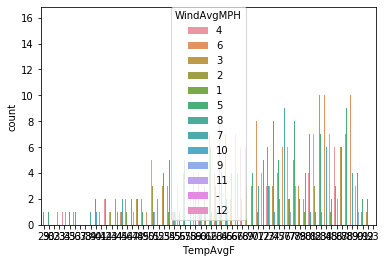

In [35]:
sns.countplot(x='TempAvgF', hue='WindAvgMPH', data = sub_data)

In [37]:
sub_data.isnull().sum()

TempAvgF                     0
DewPointAvgF                 0
HumidityAvgPercent           0
SeaLevelPressureAvgInches    0
VisibilityAvgMiles           0
WindAvgMPH                   0
PrecipitationSumInches       0
Events                       0
dtype: int64

In [38]:
sub_data = sub_data.replace('T', 0.0) 
sub_data = sub_data.replace('-', 0.0)
sub_data.head(20)

,TempAvgF,DewPointAvgF,HumidityAvgPercent,SeaLevelPressureAvgInches,VisibilityAvgMiles,WindAvgMPH,PrecipitationSumInches,Events
0,60,49,75,29.68,7,4,0.46,"Rain , Thunderstorm"
1,48,36,68,30.13,10,6,0,
2,45,27,52,30.49,10,3,0,
3,46,28,56,30.45,10,4,0,
4,50,40,71,30.33,10,2,0,
5,48,36,63,30.4,9,3,0,
6,53,39,65,30.39,9,1,0,
7,51,39,64,30.17,10,2,0,
8,50,41,76,30.1,10,5,0,
9,40,26,60,30.33,10,5,0,


In [40]:
sub_data.drop("Events",axis =1,inplace =True)

In [41]:
sub_data.head()

,TempAvgF,DewPointAvgF,HumidityAvgPercent,SeaLevelPressureAvgInches,VisibilityAvgMiles,WindAvgMPH,PrecipitationSumInches
0,60,49,75,29.68,7,4,0.46
1,48,36,68,30.13,10,6,0
2,45,27,52,30.49,10,3,0
3,46,28,56,30.45,10,4,0
4,50,40,71,30.33,10,2,0


In [47]:
#split data
array_Data =sub_data.values
X = array_Data[:,1:]
Y = array_Data[:,0]
t_size = 0.2
seed =2

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = t_size, random_state = seed)

In [51]:
from sklearn.linear_model import LinearRegression

In [54]:
linearRM = LinearRegression()

In [55]:
linearRM.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
r_sq =linearRM.score(X_train, Y_train)
r_sq

0.899290374895695

In [75]:
y_predV = linearRM.predict(X_test)

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [86]:
Y_test = Y_test.reshape(len(Y_test), 1)
y_predV = y_predV.reshape(len(y_predV), 1)
print(Y_test[:10])
print(y_predV[:10])

[[87.]
 [74.]
 [86.]
 [73.]
 [84.]
 [89.]
 [62.]
 [58.]
 [52.]
 [71.]]
[[82.15148379]
 [75.07707004]
 [82.16762998]
 [72.58801498]
 [81.898538  ]
 [86.98353871]
 [66.42849779]
 [59.03267729]
 [54.62039537]
 [77.57201939]]
Accuracy:  0.934494956663178


In [87]:
#r2_score = reg.score(X, y)
r2 = r2_score(Y_test, y_predV)
print("Accuracy: ",r2)

Accuracy:  0.934494956663178
